# Primera RN con Keras

Nota: Antes de comenzar es necesario activar los GPU. En el menú **Runtime** >> **Change runtime type** >> **Harware acelerator**, cambiar a **CPU**.


In [1]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical # One-hot encoding 
from keras.datasets import mnist
import matplotlib.pyplot as plt

Cargar los datos

El dataset MNIST se conforma de 60000 datos de entrenamiento  y 10000 datos de prueba. El dataset ha sido pre-normalizado para reducir su resolución mediante técnicas de anti-aliasing, y se centraron calculado el centro de masa para ser posicionadas en el campo de 28 x 28 píxeles.



In [2]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

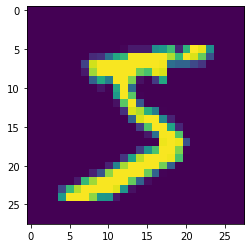

In [4]:
plt.imshow(train_data[0])

In [5]:
train_labels[0]

5

Cargar y configurar el modelo de la red neuronal.

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = 'accuracy')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Modificar los datos para un mejorar el manejo de los datos: 
* Un cambio de tres dimensiones a dos dimensiones.
* Cambio de tipo de dato 
* Normalización de los valores que representa cada pixel entre 0 y 1.

In [8]:
x_train = train_data.reshape(60000, 28 * 28)
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape(10000, 28 * 28)
x_test = x_test.astype('float32') / 255

In [ ]:
# Ejemplo de la transformación
x_train[0]

In [10]:
# Ejemplo de los valores de las etiquetas actuales en y_train
train_labels[0]

5

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
# Ejemplo de la transformación de las etiquetas
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Entrenar la RN

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0138 - accuracy: 0.9957
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0100 - accuracy: 0.9973


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9828


[0.06804604828357697, 0.9828000068664551]

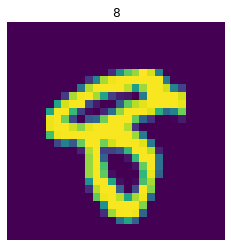

In [22]:
# Selecciona un numero al azar dentro de x_test
index = 1052
#plt.figure(figsize=(10,10))
d_image = x_test[index]
plt.imshow(d_image.reshape(28, 28))
# plt.title(y_test[index]) # para verlo como array
plt.title( np.argmax(y_test[index], axis=-1) ) # para ver el numero como tal
plt.axis(False)
plt.show()

In [23]:
prediccion_array = model.predict(x_test[index].reshape(1,28*28))

print('el numero es:',np.argmax(prediccion_array, axis=-1))

1/1 [==============================] - 0s 24ms/step
el numero es: [8]
